In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 500)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'data/tweet_data.csv')

In [3]:
print(df.shape)
print(df.columns)
df.head(2)

(785916, 18)
Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')


,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,"America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",Business,1732809,16184358,CNN Business,NaN


* After observation of the data, we can see :
1. Columns which are definitelly not be used: crDate, engages, likes, photoUrl, retweets, usFlwrs, rtUsID, usID, videoUrl - will be dropped.
2. Columns which will be definitelly used: tweetID(for indexing purposes), edInput(Label), text, topicName
3. Columns which need more analysis: editor, isApproved, isEdNeed, isRT

In [4]:
df = df[['tweetID', 'edInput', 'editor', 'isApproved',
       'isEdNeed', 'isRT', 'text',
       'topicName', 'usName', ]]

In [5]:
df

,tweetID,edInput,editor,isApproved,isEdNeed,isRT,text,topicName,usName
0,1070867471245164544,-1,-1,False,True,False,The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK,Business,The Economist
1,1070868017888837633,-1,-1,False,True,False,"America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",Business,CNN Business
2,1070868012864028673,-1,-1,False,True,False,Lyft files for what is expected to be one of the hottest IPOs in 2019 https://t.co/qEjyniazlD,Business,FORTUNE
3,1070867995239555075,-1,-1,False,True,False,"Exporters still waiting to get Rs 6,000 crore worth of input tax credit refunds\n\nMany being denied tax refunds by state governments, such as Andhra Pradesh, Uttar Pradesh, Bihar and Chhattisgarh, who say they are cash starved\n\n@Subhayan_ism @GST_Council\n\nhttps://t.co/QRBg8b98Rr",Business,Business Standard
4,1070867995205885952,-1,-1,False,True,False,Ride-hailing firm Lyft races to leave Uber behind in IPO chase https://t.co/0qCsdx2LYS https://t.co/gHZLUntYkL,Business,Reuters Business
...,...,...,...,...,...,...,...,...,...
785911,1147325851614117888,-1,-1,False,True,True,Relations are DIFFERENT\nnot DIFFICULT.,Motivational,Wit & Wisdom 💯
785912,1153184058714624001,-1,-1,False,True,True,"""to live a creative life, we must lose our fear of being wrong""......... https://t.co/LF0e0xV5Q7",Interesting,DeepFeling™
785913,1153048802116292608,-1,-1,False,True,True,Who's your comic crush? https://t.co/H29dhXw3kf,Memes,Twitter Movies
785914,1154063052997836801,-1,-1,True,True,False,"After a flight of 195 hours, 18 minutes, 35 seconds - the #Apollo11 crew splashed down in the North Pacific Ocean, 900 miles southwest of Hawaii! Here’s a photo of their recovery as we celebrate the #Apollo50th anniversary: https://t.co/Y4zhGTQlPj https://t.co/fBpvcECsjp",Random,NASA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785916 entries, 0 to 785915
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweetID     785916 non-null  int64 
 1   edInput     785916 non-null  int64 
 2   editor      785916 non-null  int64 
 3   isApproved  785916 non-null  bool  
 4   isEdNeed    785916 non-null  bool  
 5   isRT        785916 non-null  bool  
 6   text        785916 non-null  object
 7   topicName   785916 non-null  object
 8   usName      785916 non-null  object
dtypes: bool(3), int64(3), object(3)
memory usage: 38.2+ MB


In [7]:
df['edInput'].value_counts()

-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: edInput, dtype: int64

In [8]:
df['editor'].value_counts()

-1       422665
 5004     68536
 5003     68186
 5002     59317
 5001     52629
 5006     40658
 5007     27722
 5005     24934
 5008     21167
 5101        44
 1001        36
 2001        22
Name: editor, dtype: int64

In [9]:
df['isEdNeed'].value_counts()

True    785916
Name: isEdNeed, dtype: int64

* Dropping 'isEdNeed' as it is the same values for all the rows. Dropping 'editor' as this seems to be an editor IDs.

In [10]:
df = df.drop(columns=['isEdNeed','editor'])

* we can drop rows with 'edinput' other than -1,1,2 as we don't know what they mean and more client communication needed to understand them.

In [11]:
df = df[df['edInput'].isin([-1,1,2])]
df = df.set_index('tweetID', drop=True)

In [12]:
print(df.shape)
df.head(2)

(744983, 6)


,edInput,isApproved,isRT,text,topicName,usName
tweetID,,,,,,
1070867471245164544,-1,False,False,The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK,Business,The Economist
1070868017888837633,-1,False,False,"America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",Business,CNN Business


* Let's run correlation matrix to see if we not missing anything before dropping IsApproved and isRT.

In [13]:
df[df['edInput']!=-1][['edInput','isApproved','isRT']].corr()

,edInput,isApproved,isRT
edInput,1.000000,-1.000000,0.246425
isApproved,-1.000000,1.000000,-0.246425
isRT,0.246425,-0.246425,1.000000


* As we see from the correlation matrix, we can drop 'isApproved' as it is the same as our label.
* isRT column - after quick google search it seems that it is a boolean column which indicates if the tweet is a retweet or not. We can remove it.
* We also split the data into labeled and not yet labeled data. We need labeled data in order to train our model. I'll keep our unlabeled data to use it later for predictions on the "real world" data.

In [14]:
df = df.drop(columns=['isApproved','isRT'])

In [15]:
df_unlabeled = df[df['edInput']==-1]
df = df[df['edInput']!=-1]

In [16]:
print(df_unlabeled.shape)
print(df.shape)

(422665, 4)
(322318, 4)


In [17]:
df.columns

Index(['edInput', 'text', 'topicName', 'usName'], dtype='object')

In [18]:
df = df[['edInput', 'topicName', 'usName','text' ]]
df

,edInput,topicName,usName,text
tweetID,,,,
1070970722598707200,1,Fashion,Gentleman’s style,Which one would you choose? 👀 https://t.co/U0s3alfBNp
1070981773616648193,1,Interesting,Satisfying Slime,How it’s made. 😊 https://t.co/3XjOw4gIkg
916500037818916866,2,Interesting,Tips & Tricks Ideas ✌,"Smile, because it confuses people. Smile, because it’s easier than explaining what is killing you inside. https://t.co/FGlnnRfP5w"
1071135340696625152,1,Art,𝐴𝑟𝑡.,𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡 https://t.co/WdavWJcSyw
1071141175606829056,1,Animal,Nature is Amazing ☘️,Baby Alpacas are so under appreciated. https://t.co/SDXjKaVscv
...,...,...,...,...
1153952965650079744,1,Flowers,BGCI,Apply for a grant to implement plant conservation at your botanic garden today! https://t.co/gj2eDzIWeB https://t.co/z1iJjZPOFn
1154059414174703617,2,Business,FOOD INSIDER,Are you team Shake Shack or team In-N-Out? https://t.co/3bDmzocr6P
1154061474383441920,1,Art,Phaidon,How @OlafurEliasson's 'hedonistic' dad helped his art https://t.co/x9tFi65TjW @BBCHARDtalk @TheZeinabBadawi https://t.co/Ocuv6jrVbH


* Since we will be clasifying only Business or no business tweets, we need to create a new column which will be :
1. 1 if the 'topicName' == Business and 'edInput' == 1 
2. We drop other topics.

In [19]:
df = df.copy(deep=True)
df = df[df['topicName']=='Business']
df.shape

(30024, 4)

* Removing topicName and edInput columns as we don't need them anymore.

In [20]:
df.loc[:,'IsBusiness'] = np.where(df['edInput']==1, 1, 0)
df = df[['IsBusiness', 'usName', 'text']]
df.head(2)

,IsBusiness,usName,text
tweetID,,,
1072758722315862021,0,BBC Breaking News,UK Prime Minister Theresa May will face a vote of no confidence in her leadership later on Wednesday https://t.co/wzta1v9ScU
1072959907958276096,0,BBC Breaking News,UK PM Theresa May wins confidence vote with 200 out of 317 Tory MPs supporting her to stay on as leader\n\nhttps://t.co/9Vw2gOQoDc https://t.co/bafuUsZoKa


* Cheching how balanced our data is:

In [21]:
print(df['IsBusiness'].value_counts())

1    17836
0    12188
Name: IsBusiness, dtype: int64


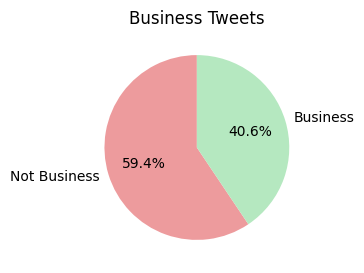

In [22]:
plt.figure(figsize=(3,3))
plt.pie(df['IsBusiness'].value_counts(), labels=['Not Business', 'Business'], autopct='%1.1f%%', startangle=90, colors=['#ED9B9D','#B5E8C0'])
plt.title('Business Tweets')
plt.show()

#### We can clearly see, that the data is not balanced. We will need to balance the data before training the model.
Few possible ways to approach:
1. __Using the correct metrics for imbalanced data.__ I will not use Accuracy as it will not give us a good results as we can classify all samples as "Not Business" and get an accuracy of 94.5%, yet totally failing to catch "Business" samples. I'll use F1 score. F1 is a harmonic mean of precision and recall. It is a good metric to use when we have imbalanced data.
2. __Oversampling__ - Randomly increasing of the minority class using the same data points. This technic can be pron to overfitting, especially if we oversample too much.  
3. __Synthetic Minority Oversampling Technique - SMOTE__ - This technic will create new samples based on the existing ones. It will not overfit as much as the oversampling, but it can be pron to overfitting as well. This generaes "Similar" samples, but not the same.
3. __Undersampling__ - This will help us to balance the data, but we will lose some of the data randomly truncated. Using this we can lose some crutial information. 
5. __Using Bagging__ - BalancedBaggingClassifier - sklearn classifier but with additional balancing.
6. __Treshhold moving + Grid Search__ - We can try to move the treshhold for the classification and see if we can get better results. For imbalanced data sets default 0.5 treshhold doesn't work well. We can also use Grid Search to find the best treshhold.

* Before dealing with the imbalanced data:
1. Let's clean obvious noise: 
    1. Scikit-learn has basic buit-in text cleanng regex. 
    2. And we need to deal with URLs inside all docs.
    3. As well as with emojis.
    4. And Stopwords.
2. Train the model with the default parameters and see what we get to estimate the baseline.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression # Our Baseline Model
from sklearn.tree import DecisionTreeClassifier
# import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_fscore_support

import xgboost as xgb

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.ensemble import BalancedBaggingClassifier

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
import demoji
from unidecode import unidecode
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def custom_tokenizer(doc):   
    # define stopwords 
    stops = (stopwords.words('english'))
    stops.extend([])    

    doc = demoji.replace_with_desc(doc, sep=' ') # replace emojis with text
    doc = unidecode(doc) # remove accents
    doc = re.sub(r'http\S+', '', doc) # remove urls
    doc = re.sub(r'\b\d+\b','', doc) # remove numbers
    doc = doc.lower() # decapitalization
    doc = re.findall(r'(?u)\b\w\w+\b', doc) # standard scikit-learn pattern

    tokens = [word for word in doc if word not in stops] # remove stopwords

    return tokens

# ---------------- For testing ----------------
# print(df['text'].iloc[0])
# doc = df['text'].iloc[0] + ' 544' + ' Them' + ' Abig' + ' 東日本大震災から8年'
# custom_tokenizer(doc)

* Splitting the data into train and test sets.

In [25]:
y = df['IsBusiness']
X = df['text']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)
print (X_train_text.shape, y_train.shape)
print (X_test_text.shape, y_test.shape)

(24019,) (24019,)
(6005,) (6005,)


* Checking split results to see if we have the same distribution of classes in both sets.

In [26]:
print(y_train.value_counts().iloc[1]/y_train.value_counts().iloc[0])
print(y_test.value_counts().iloc[1]/y_test.value_counts().iloc[0])

0.6832994603686313
0.6834875245304177


In [27]:
# Preparing more pythonic way to save and load objects
def save_load_obj(obj, path, mode='save'):
    if mode == 'save':
        with open(path, 'wb') as file:
            pickle.dump(obj, file)
    else:
        with open(path, 'rb') as file:
            return pickle.load(file)

#### Here data prep ends and we start looking for better relampling and model tuning.

In [28]:
# Raising error to be able to jump to different cells after data prep.
raise Exception('Stop Execution')

Exception: Stop Execution

### 1st Run

In [ ]:
vect = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=5, max_df=0.2, ngram_range=(1,2))
# Tokenization and building vocabulary with Fit
vect_fitted = vect.fit(X_train_text)

save_load_obj(vect_fitted, r'1st run\TfidfVect-X_train-fit-mindf-5-maxdf-02-ngram-2.pkl', mode='save')

In [ ]:
vect_fitted = save_load_obj('', r'1st run\TfidfVect-X_train-fit-mindf-5-maxdf-02-ngram-2.pkl', mode='load')

In [ ]:
feature_names = vect_fitted.get_feature_names_out()

print(f'Vocabulary size: {len(vect_fitted.vocabulary_)}')

c = 0
to_print = []
for i, value in enumerate(feature_names):
    # print every 2000th key
    if c % 2000 == 0:
        to_print.append(value)
    c += 1
print(f'\nEvery 10000th word: \n {to_print}')
print(f'\nFisrt 25 words: \n {feature_names[:25]}')
print(f'\nLast 25 words: \n {feature_names[-25:]}')


Vocabulary size: 10130

Every 10000th word: 
 ['10th', 'costs', 'help employees', 'next iphone', 'sharp', 'worrying']

Fisrt 25 words: 
 ['10th' '11th' '17th' '18th' '1960s' '1970s' '1980s' '1mdb' '1mdb scandal'
 '1st' '21st' '21st century' '2nd' '30s' '35s' '3d' '3rd' '40s' '4th'
 '50s' '50th' '50th anniversary' '5g' '5g mobile' '5g network']

Last 25 words: 
 ['york times' 'yorkers' 'young' 'young people' 'younger' 'youngest'
 'youth' 'youtube' 'youtube star' 'youtuber' 'yuan' 'zealand'
 'zealand mosque' 'zealand prime' 'zero' 'zhong' 'zimbabwe' 'zimmern'
 'zion' 'zion williamson' 'zip' 'zone' 'zones' 'zuckerberg'
 'zuckerberg says']


* Features seems to be ok to start working with.

In [ ]:
# Transforming the training data into a document-term sparce matrix
X_train = vect_fitted.transform(X_train_text)
save_load_obj(X_train, r'1st run\X_train-transformed.pkl', mode='save')

In [ ]:
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
print(f'X_train: {repr(X_train)}')

X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>


* Now Let's try evaluating LogReg with cross validation and see what we get.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=777) # Creating a cross-validation object to account for class imbalance.
lg = LogisticRegression(max_iter=500, n_jobs=-1)
scores = cross_val_score(lg, X_train, y_train, cv=cv, scoring='f1') # Picking F1 score as it is not balanced dataset.
print(f'Cross-Validation F1 Scores: {scores}')

Cross-Validation F1 Scores: [0.85454545 0.84555855 0.85142469 0.84575097 0.85488747 0.847981
 0.85123687 0.85182049 0.85027726 0.84810765 0.85074878 0.85128031
 0.85079151 0.85169563 0.8499242  0.85435587 0.84457974 0.85254692
 0.85361731 0.84517981]


In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(lg, param_grid, cv=cv, scoring='f1')
grid.fit(X_train, y_train)
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validation score: 0.8503155247158449
Best parameters: {'C': 1}


In [ ]:
X_test = vect_fitted.transform(X_test_text)
print(f'Base LogReg Prediction score: {grid.score(X_test, y_test)}')

Base LogReg Prediction score: 0.8462162162162162


In [ ]:
# Saving time by saving the model
save_load_obj(grid, r'1st run\LogReg-C-1-max_iter-500.pkl', mode='save')

* Initial results are not exactly the best ones, but we can do better. Let's try to:
1. Balance the data and see if we can get better results.( Oversampling - SMOTE/ADASYN, Undersampling, BaggingClassifier)
2. Modify TF-IDF parameters and see if we can get better results.
3. Try different models and see if we can get better results.

#### Balancing Data

### 2nd Run
* Oversampling - SMOTE

In [ ]:
# Loading X_train from the previous run
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
print(f'X_train: {repr(X_train)}')

X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>


In [ ]:
# Resampling the minority class.
sm = SMOTE(random_state=777)
# Fit the model to generate the data.
oversampled_X_train, oversampled_y_train = sm.fit_resample(X_train, y_train)

In [ ]:
print(f'oversampled_X shape: {oversampled_X_train.shape}')
print(f'oversampled_y shape: {oversampled_y_train.shape}')
print(f'oversampler_y value counts:\n',oversampled_y_train.value_counts())

oversampled_X shape: (28538, 10130)
oversampled_y shape: (28538,)
oversampler_y value counts:
 1    14269
0    14269
Name: IsBusiness, dtype: int64


In [ ]:
# GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lg, param_grid, cv=5, scoring='f1') # Maybe change to accuracy as it is balanced now ?
grid.fit(oversampled_X_train, oversampled_y_train)
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validation score: 0.8346745308992229
Best parameters: {'C': 1}


In [ ]:
#---------------------------------------
# Predicting on the test set
X_test = vect_fitted.transform(X_test_text)
score = int(round(grid.score(X_test, y_test), 2)*100)
print(f'Base LogReg Prediction score: {score}')

Base LogReg Prediction score: 83


In [ ]:
save_load_obj(grid, rf'2nd run - SMOTE\LogReg-C-1-max_iter-500-F1-{score}%.pkl', mode='save')

### 3rd Run
* Oversampling ADASYN

In [ ]:
# Loading X_train from the previous run
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
print(f'X_train: {repr(X_train)}')

# Resampling the minority class.
ada = ADASYN(random_state=77)
# Fit the model to generate the data.
oversampled_X_train, oversampled_y_train = ada.fit_resample(X_train, y_train)

print(f'oversampled_X shape: {oversampled_X_train.shape}')
print(f'oversampled_y shape: {oversampled_y_train.shape}')
print(f'oversampler_y value counts:\n',oversampled_y_train.value_counts())

X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>


d:\Study 2018 and later\Mignimind Bootcamp\Code\P4-NLP-Tweet-Classification\.venv\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


oversampled_X shape: (30486, 10130)
oversampled_y shape: (30486,)
oversampler_y value counts:
 0    16217
1    14269
Name: IsBusiness, dtype: int64


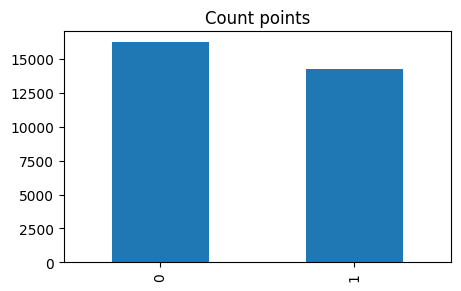

In [ ]:
oversampled_y_train.value_counts().plot(kind='bar', title='Count points', figsize=(5, 2))
plt.show()

In [ ]:
# GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lg, param_grid, cv=5, scoring='f1') # Maybe change to accuracy as it is balanced now ?
grid.fit(oversampled_X_train, oversampled_y_train)
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validation score: 0.8326337342684461
Best parameters: {'C': 10}


In [ ]:
#---------------------------------------
# Predicting on the test set
X_test = vect_fitted.transform(X_test_text)
score = int(round(grid.score(X_test, y_test), 2)*100)
print(f'Base LogReg Prediction score: {score}%')

Base LogReg Prediction score: 83%


In [ ]:
save_load_obj(grid, rf'3rd run - ADASYN\LogReg-C-10-max_iter-500-F1-{score}%.pkl', mode='save')

### 4th Run
* Undersampling - ClusterCentroids

In [ ]:
lg = LogisticRegression(max_iter=500, n_jobs=-1)
vect_fitted = save_load_obj('', r'1st run\TfidfVect-X_train-fit-mindf-5-maxdf-02-ngram-2.pkl', mode='load')

In [ ]:
# Loading X_train from the previous run
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
print(f'X_train: {repr(X_train)}')

from collections import Counter 
cc = ClusterCentroids(random_state=77)
undersam_X_train, undersam_y_train = cc.fit_resample(X_train, y_train)

save_load_obj(undersam_X_train, r'4th run - Undersample - ClusterCentroids\undersam_X_train.pkl', mode='save')
save_load_obj(undersam_y_train, r'4th run - Undersample - ClusterCentroids\undersam_y_train.pkl', mode='save')

print(f'oversampled_X shape: {undersam_X_train.shape}')
print(f'oversampled_y shape: {undersam_y_train.shape}')
print(f'oversampler_y value counts:\n',undersam_y_train.value_counts())
print(sorted(Counter(undersam_y_train).items()))

X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>


d:\Study 2018 and later\Mignimind Bootcamp\Code\P4-NLP-Tweet-Classification\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


oversampled_X shape: (19500, 10130)
oversampled_y shape: (19500,)
oversampler_y value counts:
 0    9750
1    9750
Name: IsBusiness, dtype: int64
[(0, 9750), (1, 9750)]


In [ ]:
# GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lg, param_grid, cv=5, scoring='f1') # Maybe change to accuracy as it is balanced now ?
grid.fit(undersam_X_train, undersam_y_train)
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validation score: 0.8010998669643417
Best parameters: {'C': 1}


In [ ]:
#---------------------------------------
# Predicting on the test set
X_test = vect_fitted.transform(X_test_text)
score = int(round(grid.score(X_test, y_test), 2)*100)
print(f'Base LogReg Prediction score: {score}%')

Base LogReg Prediction score: 83%


In [ ]:
save_load_obj(grid, rf'4th run - Undersample - ClusterCentroids\LogReg-C-1-max_iter-500-F1-{score}%.pkl', mode='save')

### 5th Run
* BalancedBaggingClassifier with sampling_strategy  
This is one of the methods to deal with imbalanced data. It is a bagging classifier which uses balanced bootstrap to create new samples.

In [ ]:
lg = LogisticRegression(max_iter=500, n_jobs=-1)
vect_fitted = save_load_obj('', r'1st run\TfidfVect-X_train-fit-mindf-5-maxdf-02-ngram-2.pkl', mode='load')

In [ ]:
# Loading X_train from the previous run
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
print(f'X_train: {repr(X_train)}')

bbc = BalancedBaggingClassifier(base_estimator=lg,
                                sampling_strategy='not majority', # upsample the minority class
                                replacement=False, 
                                random_state=77)
bbc.fit(X_train, y_train)
#---------------------------------------
# Predicting on the test set
X_test = vect_fitted.transform(X_test_text)
score = int(round(bbc.score(X_test, y_test), 2)*100)
print(f'Base LogReg Prediction score: {score}%')


X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>


d:\Study 2018 and later\Mignimind Bootcamp\Code\P4-NLP-Tweet-Classification\.venv\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Base LogReg Prediction score: 81%


In [ ]:
save_load_obj(bbc, rf'5th run - BalancedBaggingClassifier\BBC-sampling_str-not-majority-F1-{score}%.pkl', mode='save')

* Seems like the best result we had with StratifiedKFold, so we try to tune the different models with GridSearchCV using StratifiedKFold as our CV.

### 6th Run
* DecisionTreeClassifier with StratifiedKFold and GridSearchCV  
I wll try DecisionTreeClassifier as it is simple and quick model. If any good results come out of it, we can easily explain the model.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=777) # Creating a cross-validation object to account for class imbalance.
dtc = DecisionTreeClassifier(random_state=77)
scores = cross_val_score(dtc, X_train, y_train, cv=cv, scoring='f1') # Picking F1 score as it is not balanced dataset.
print(f'Cross-Validation F1 Scores: {scores}')

Cross-Validation F1 Scores: [0.7872191  0.78423237 0.79264731 0.78219895 0.79362329 0.78835425
 0.80338924 0.79354055 0.78780488 0.78938237 0.7849556  0.79091703
 0.79166667 0.79447853 0.78940993 0.79481417 0.78268489 0.79384296
 0.78319736 0.78133193]


In [ ]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'criterion': ['gini', 'entropy']}
grid = GridSearchCV(dtc, param_grid, cv=cv, scoring='f1')
grid.fit(X_train, y_train)
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')


Best cross-validation score: 0.7569765045551312
Best parameters: {'criterion': 'gini', 'max_depth': 13}


In [ ]:
# Predicting on the test set
X_test = vect_fitted.transform(X_test_text)
score = int(round(grid.score(X_test, y_test), 2)*100)
print(f'Base Decision Tree Classifier Prediction score: {score}%')

Base Decision Tree Classifier Prediction score: 76%


* I'm not going to even save it. 

### 7th Run
* XGBClassifier with StratifiedKFold and GridSearchCV

In [31]:
# Loading X_train, fitted vectorizer from the previous run
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
vect_fitted = save_load_obj('', r'1st run\TfidfVect-X_train-fit-mindf-5-maxdf-02-ngram-2.pkl', mode='load')
print(f'X_train: {repr(X_train)}')

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=777) 

X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>


In [ ]:
xgb_model = xgb.XGBClassifier()

scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='f1') 
print(f'Cross-Validation F1 Scores: {scores}')

Cross-Validation F1 Scores: [0.80372493 0.80620715 0.80816832 0.80886427 0.8019943  0.80769231
 0.8057598  0.79202899 0.79681851 0.80656674]


In [39]:
# https://www.kaggle.com/code/phunter/xgboost-with-gridsearchcv
# https://blog.dataiku.com/narrowing-the-search-which-hyperparameters-really-matter
param_grid = {'learning_rate': [0.1, 0.3, 0.5],
                'max_depth': [3, 5, 6, 7],
                'n_estimators': [5, 50, 120]
}
xgb_model = xgb.XGBClassifier(  nthread=4, 
                                objective='binary:logistic', 
                                min_child_weight=1, 
                                subsample=0.8, 
                                tree_method="gpu_hist", 
                                verbosity=1, 
                                seed=77)
grid = GridSearchCV(xgb_model, param_grid, cv=cv, scoring='f1', verbose=10)
grid.fit(X_train, y_train)
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Fitting 20 folds for each of 36 candidates, totalling 720 fits
[CV 1/20; 1/36] START learning_rate=0.1, max_depth=3, n_estimators=5............
[CV 1/20; 1/36] END learning_rate=0.1, max_depth=3, n_estimators=5;, score=0.749 total time=   0.2s
[CV 2/20; 1/36] START learning_rate=0.1, max_depth=3, n_estimators=5............
[CV 2/20; 1/36] END learning_rate=0.1, max_depth=3, n_estimators=5;, score=0.746 total time=   0.1s
[CV 3/20; 1/36] START learning_rate=0.1, max_depth=3, n_estimators=5............
[CV 3/20; 1/36] END learning_rate=0.1, max_depth=3, n_estimators=5;, score=0.752 total time=   0.0s
[CV 4/20; 1/36] START learning_rate=0.1, max_depth=3, n_estimators=5............
[CV 4/20; 1/36] END learning_rate=0.1, max_depth=3, n_estimators=5;, score=0.748 total time=   0.0s
[CV 5/20; 1/36] START learning_rate=0.1, max_depth=3, n_estimators=5............
[CV 5/20; 1/36] END learning_rate=0.1, max_depth=3, n_estimators=5;, score=0.748 total time=   0.0s
[CV 6/20; 1/36] START learning_r

AttributeError: 'XGBClassifier' object has no attribute 'grid_scores_'

In [45]:
# Predicting on the test set
X_test = vect_fitted.transform(X_test_text)
score_F1 = grid.score(X_test, y_test)  
round_score_F1 = int(round(score_F1, 2)*100)
print(score_F1)
print(f'XGBoost F1 score: {round_score_F1}%')

0.7494237734606519
XGBoost F1 score: 75%


In [42]:
save_load_obj(grid, rf'6th run - XGBoost\XGB-lr-01-md-3-nest-5-F1-{round_score_F1}%.pkl', mode='save')

In [44]:
y_pred = grid.predict(X_test)
prf1 = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f'Precision, Recall, F1: {prf1[:3]}')

Precision, Recall, F1: (0.6158008658008658, 0.9571068124474348, 0.7494237734606519)


* We see, that precision is not that good, but recall is good. We can try to move the treshhold to see if we can get better results.  
Let's go back to the best results with LogisticRegression and see our presicion and recall.

#### Moving Threshold for besst LogisticRegression model

In [68]:
# Loading saved objects from the previous run
first_run_lg = save_load_obj('', r'1st run\LogReg-C-1-max_iter-500-F1-85%.pkl', mode='load')
X_train = save_load_obj('', r'1st run\X_train-transformed.pkl', mode='load')
vect_fitted = save_load_obj('', r'1st run\TfidfVect-X_train-fit-mindf-5-maxdf-02-ngram-2.pkl', mode='load')
print(f'X_train: {repr(X_train)}')
print(first_run_lg)
print(first_run_lg.best_params_)

X_train: <24019x10130 sparse matrix of type '<class 'numpy.float64'>'
	with 242922 stored elements in Compressed Sparse Row format>
GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=5, random_state=777),
             estimator=LogisticRegression(max_iter=500, n_jobs=-1),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]}, scoring='f1')
{'C': 1}


* Glance on our Precision and Recall

In [70]:
y_pred = first_run_lg.predict(X_test)
prf1 = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f'Precision, Recall, F1: {prf1[:3]}')

Precision, Recall, F1: (0.8168536394469085, 0.8777684328567423, 0.8462162162162162)


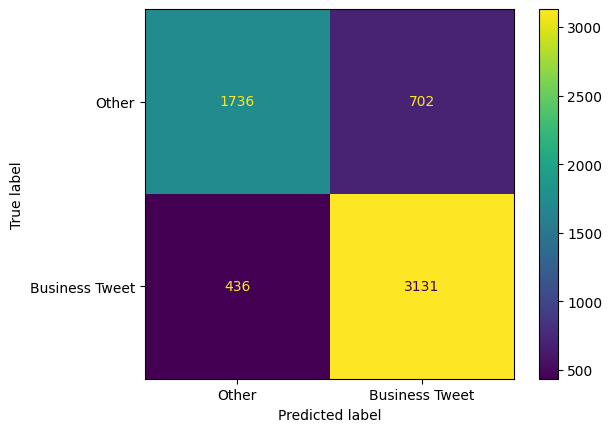

In [74]:
# plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Other', 'Business Tweet'])
    disp.plot()
    plt.show()

plot_confusion_matrix(y_test, y_pred, first_run_lg)

In [95]:
cm = confusion_matrix(y_test, y_pred, labels=first_run_lg.classes_)
TP_biz_tweets = cm[1][1]
FP_biz_tweets = cm[1][0]
print(f'True Positive Business tweets: {TP_biz_tweets}')
print(f'False Positive Business tweets: {FP_biz_tweets}')

True Positive Business tweets: 302
False Positive Business tweets: 3265


* Now let's move our treshhold and see how far we can optimize for Precision (We need our model to be as precise as possible, as we don't want to make many classifications as "Business" when they are not, to make customer experience better)

In [97]:
df = pd.DataFrame(columns=['Precision', 'Recall', 'F1', 'Treshold'])
for treshold in np.arange(0.5, 1, 0.05):
    y_pred = (first_run_lg.predict_proba(X_test)[:, 1] >= treshold).astype(int)
    prf1 = precision_recall_fscore_support(y_test, y_pred, average='binary')

    cm = confusion_matrix(y_test, y_pred, labels=first_run_lg.classes_)
    TP_biz_tweets = cm[1][1]
    FP_biz_tweets = cm[1][0]
    tru_biz_to_false_biz = TP_biz_tweets / FP_biz_tweets
    # build a dataframe with Precision, Recall, F1, Treshold
    data = {'Precision': prf1[0], 'Recall': prf1[1], 'F1': prf1[2], 'Treshold': treshold, 'Biz Tweet ratio': tru_biz_to_false_biz}
    df = pd.concat([df, pd.DataFrame(data, index=[0])], ignore_index=True)
df

,Precision,Recall,F1,Treshold,Biz Tweet ratio
0,0.816854,0.877768,0.846216,0.50,7.181193
1,0.837559,0.842725,0.840134,0.55,5.358289
2,0.860012,0.792262,0.824748,0.60,3.813765
3,0.888024,0.735913,0.804844,0.65,2.786624
4,0.909196,0.662461,0.766461,0.70,1.962625
5,0.927770,0.579759,0.713596,0.75,1.379586
6,0.944444,0.481357,0.637697,0.80,0.928108
7,0.954032,0.354920,0.517368,0.85,0.550196
8,0.968009,0.229044,0.370438,0.90,0.297091
9,0.980519,0.084665,0.155871,0.95,0.092496


* Looking on the table we can arbitrarily say we want our model to do 1:1 ratio of Correct Business to Incorrect Business classifications. Just not to waste data to much.   
So, we can set our treshhold to 0.8 and get 0.94 precision and 0.63 recall.  
let's run a model on this parameters and see what we get:

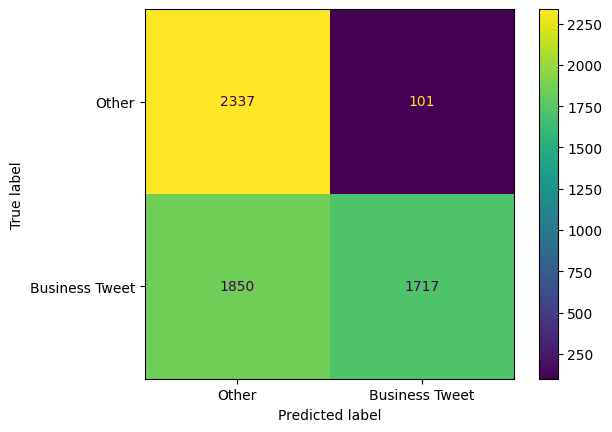

In [100]:
y_pred_t08 = (first_run_lg.predict_proba(X_test)[:, 1] >= 0.8).astype(int)
plot_confusion_matrix(y_test, y_pred_t08, first_run_lg)

* We can use this model for predictions and expecct to have 94% precision - meaning that 94% of the tweets we classify as "Business" are actually "Business".